<a href="https://colab.research.google.com/github/apatino16/NaturalLanguageProcessing/blob/main/APatino_Homework4_%5BNLP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Natural Language Processing* - Winter 2024 - Homework 4



> By Anny Patino


In [217]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
from scipy import linalg as lg
from scipy.linalg import svd
import pandas as pd
import matplotlib.pyplot as plt


# Scikit-Learn: CountVectorizer and TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer()

## Problem 1

Compute the Eigen vectors and Eigen values of the following 3 matrices.

1.
$$
\left[
\begin{matrix}
2 & 0 \\
0 & 5 \\
\end{matrix}
\right]
$$


2.
$$
\left[
\begin{matrix}
4 & 1 & 6 \\
0 & 2 & 3 \\
0 & 0 & 9 \\
\end{matrix}
\right]
$$


3.
$$
\left[
\begin{matrix}
1 & 4 & 0 & 0 \\
0 & 2 & 0 & 0 \\
5 & 3 & 1 & 1 \\
4 & 7 & 2 & 2 \\
\end{matrix}
\right]
$$


In [170]:
# Eigen vectors and Eigen values of matrix 1
m1 = np.array([[2,0], [0,5]])
# print(m1)

values_m1, vector_m1 = lg.eig(m1)

print("\nValues for the first matrix:")
print(values_m1)

print("\nVectors for the first matrix:")
print(vector_m1)


Values for the first matrix:
[2.+0.j 5.+0.j]

Vectors for the first matrix:
[[1. 0.]
 [0. 1.]]


In [171]:
# Eigen vectors and Eigen values of matrix 2
m2 = np.array([[4, 1, 6], [0, 2, 3], [0, 0, 9]])
# print(m2)

values_m2, vector_m2 = lg.eig(m2)

print("\nValues for the second matrix:")
print(values_m2)

print("\nVectors for the second matrix:")
print(vector_m2)


Values for the second matrix:
[4.+0.j 2.+0.j 9.+0.j]

Vectors for the second matrix:
[[ 1.     -0.4472  0.7634]
 [ 0.      0.8944  0.2545]
 [ 0.      0.      0.5937]]


In [172]:
# Eigen vectors and Eigen values of matrix 3
m3 = np.array([[1, 4, 0, 0], [0, 2, 0, 0], [5, 3, 1, 1], [4, 7, 2, 2]])
# print(m3)

values_m3, vector_m3 = lg.eig(m3)

print("\nValues for the third matrix:")
print(values_m3)

print("\nVectors for the third matrix:")
print(vector_m3)



Values for the third matrix:
[0.+0.j 3.+0.j 1.+0.j 2.+0.j]

Vectors for the third matrix:
[[ 0.      0.      0.1952  0.1093]
 [ 0.      0.      0.      0.0273]
 [-0.7071 -0.4472  0.0976 -0.3142]
 [ 0.7071 -0.8944 -0.9759 -0.9426]]


Can we compute the Eigen values and Eigen vectors of a non-square matrix?

> Eigen values and eigen vectors are inherently defined for square matrices because they arise from solving the characteristic equation
`det(A−λI)=0`, where `A` is the matrix, `λ` are the eigenvalues, and `I` is the identity matrix of the same dimensions as A.

> A square matrix is defined by having an equal number of rows and columns, which is the case for all three of these matrices: matrix m1 is a 2x2 matrix, with 2 rows and 2 columns; matrix m2 is a 3x3 matrix, with 3 rows and 3 columns; and matrix m3 is a 4x4 matrix, with 4 rows and 4 columns.

> The Eigen Values and Eigen Vectors of a non-square matrix is not defined and will raised a value error `ValueError: expected square matrix`

## Problem 2

Compute the SVD (Singular Value Decomposition) (3 separate matrices U,Sigma,V) of the following matrix.

$$ A =
\left[
\begin{matrix}
5 & 7 & 21 & 32 \\
0 & 3 & 43 & 24 \\
2 & 36 & 95 & 84 \\
92 & 37 & 57 & 64 \\
\end{matrix}
\right]
$$



In [173]:
# Create the matrix A
A = np.array([[5, 7, 21, 32], [0, 3, 43, 24], [2, 36, 95, 84], [92, 37, 57, 64]])
print("Matrix A:")
print(A)

# Compute the Singular Value Decomposition
U, Sigma, VT = svd(A)




print("\nMatrix U (Left Singular Vectors):")
print(U)
print("\nSigma matrix:")
print(Sigma)
print("\nMatrix V^T (Right Singular Vectors):")
print(VT)

Matrix A:
[[ 5  7 21 32]
 [ 0  3 43 24]
 [ 2 36 95 84]
 [92 37 57 64]]

Matrix U (Left Singular Vectors):
[[-0.2047 -0.1045 -0.5134 -0.8268]
 [-0.2402 -0.2629  0.8326 -0.4243]
 [-0.686  -0.5954 -0.1983  0.3682]
 [-0.6556  0.7519  0.0627  0.0283]]

Sigma matrix:
[181.0895  73.8151  14.8546   8.3222]

Matrix V^T (Right Singular Vectors):
[[-0.3463 -0.2822 -0.647  -0.6179]
 [ 0.914   0.0659 -0.3686 -0.1564]
 [ 0.1889 -0.3981  0.6569 -0.6119]
 [-0.0951  0.8704  0.1186 -0.4684]]


Verify that by multiplying (Matrix multiplication) of the 3 SVD matrices will result in the original matrix.

In [174]:
# Create extended sigma matrix
sigmaMatrix = np.diag(Sigma)
# print(sigmaMatrix)

# Reconstruct the original matrix by multiplying U, Sigma, and V^T
A_reconstructed = U.dot(sigmaMatrix).dot(VT)

# Print the reconstructed matrix
print("Reconstructed Matrix A:")
print(A_reconstructed)

print('\n Original Matrix A: \n' , A)

# Check if the reconstructed matrix matches the original
if np.allclose(A, A_reconstructed):
    print("\nThe reconstructed matrix matches the original matrix.")
else:
    print("\nThe reconstructed matrix does not match the original matrix.")

Reconstructed Matrix A:
[[ 5.  7. 21. 32.]
 [-0.  3. 43. 24.]
 [ 2. 36. 95. 84.]
 [92. 37. 57. 64.]]

 Original Matrix A: 
 [[ 5  7 21 32]
 [ 0  3 43 24]
 [ 2 36 95 84]
 [92 37 57 64]]

The reconstructed matrix matches the original matrix.


## Problem 3

Start with Matrix A created in the previous problem.

Make the first row of matrix ‘A’ be the sum of the 2nd and the 3rd rows. Make the last row of Matrix A same as the 2nd row.

Compute the SVD of this new matrix.

In [175]:
# Modify the matrix A according to the instructions
A[0] = A[1] + A[2]
A[-1] = A[1]
A_modified = A

# Print the modified matrix A to verify the changes
print("Modified Matrix A:")
print(A_modified)

# Compute the Singular Value Decomposition
U_modified, Sigma_modified, VT_modified = svd(A_modified)

# Convert Sigma into a diagonal matrix and print
sigmaMatrix_modified = np.diag(Sigma_modified)
print("\nSigma matrix of the modified A matrix:")
print(sigmaMatrix_modified)

Modified Matrix A:
[[  2  39 138 108]
 [  0   3  43  24]
 [  2  36  95  84]
 [  0   3  43  24]]

Sigma matrix of the modified A matrix:
[[232.67     0.       0.       0.    ]
 [  0.      18.6197   0.       0.    ]
 [  0.       0.       0.       0.    ]
 [  0.       0.       0.       0.    ]]


Why the last 2 values of the ‘Sigma’ matrix values are zeros. Explain.

> Because of the linear dependencies introduced by the modifications to A, the effective rank of A is reduced. The rank is now less than the number of rows (or columns, since A is square). This reduction in rank is directly reflected in the `Σ` matrix as zero values. Each non-zero singular value corresponds to a dimension of the vector space spanned by the matrix's rows (or columns), and a zero singular value indicates a dimension that's been collapsed due to linear dependencies.

## Problem 4

Compute the SVD (Singular Value Decomposition) (3 separate matrices U, Sigma, V) of the following 2 rectangular matrices.

4.
$$
\left[
\begin{matrix}
3 & 1 & 1 \\
-1 & 3 & 1 \\
\end{matrix}
\right]
$$


5.
$$
\left[
\begin{matrix}
1 & 1 \\
0 & 1 \\
-1 & 1 \\
\end{matrix}
\right]
$$

Verify that by multiplying (Matrix multiplication) the 3 SVD matrices will result in the original matrix.

In [176]:
# Define the matrices m4 and m5
m4 = np.array([[3, 1, 1], [-1, 3, 1]])
m5 = np.array([[1, 1], [0, 1], [-1, 1]])

# Compute the SVD for m4 and m5
U4, Sigma4, VT4 = svd(m4, full_matrices=False)
U5, Sigma5, VT5 = svd(m5, full_matrices=False)

# Convert the Sigma arrays into diagonal matrices for m4 and m5
Sigma_mat4 = np.diag(Sigma4)
Sigma_mat5 = np.diag(Sigma5)

# Reconstruct m4 and m5 by multiplying the SVD components
m4_reconstructed = U4 @ Sigma_mat4 @ VT4
m5_reconstructed = U5 @ Sigma_mat5 @ VT5

# Print the original and reconstructed matrices for comparison
print("Original m4:")
print(m4)
print("\nReconstructed m4:")
print(m4_reconstructed)

print("\nOriginal m5:")
print(m5)
print("\nReconstructed m5:")
print(m5_reconstructed)

Original m4:
[[ 3  1  1]
 [-1  3  1]]

Reconstructed m4:
[[ 3.  1.  1.]
 [-1.  3.  1.]]

Original m5:
[[ 1  1]
 [ 0  1]
 [-1  1]]

Reconstructed m5:
[[ 1.  1.]
 [ 0.  1.]
 [-1.  1.]]


## Problem 5.0

Using the Singular Value Decomposition (SVD) principals, perform the Latent Semantics Analysis
(LSA) of the following 6 documents. Divide these documents into 2 different topics.

In [177]:
# Corpus
corpus = [
'runs',
'runs pitcher innings',
'pitcher',
'touchdown',
'quarterback',
'touchdown quarterback']

print(corpus)

['runs', 'runs pitcher innings', 'pitcher', 'touchdown', 'quarterback', 'touchdown quarterback']


In [178]:
# Bag of Words
bag_of_words = vectorizer.fit_transform(corpus)
print(bag_of_words)

  (0, 3)	1
  (1, 3)	1
  (1, 1)	1
  (1, 0)	1
  (2, 1)	1
  (3, 4)	1
  (4, 2)	1
  (5, 4)	1
  (5, 2)	1


In [179]:
# Pandas dataframe count vector

# Document & Words
df = pd.DataFrame(bag_of_words.toarray(), columns = vectorizer.get_feature_names_out())
print(df)

# Words & Documents
df.T

   innings  pitcher  quarterback  runs  touchdown
0        0        0            0     1          0
1        1        1            0     1          0
2        0        1            0     0          0
3        0        0            0     0          1
4        0        0            1     0          0
5        0        0            1     0          1


,0,1,2,3,4,5
innings,0,1,0,0,0,0
pitcher,0,1,1,0,0,0
quarterback,0,0,0,0,1,1
runs,1,1,0,0,0,0
touchdown,0,0,0,1,0,1


## Problem 5.1
Using the SK Learn CounVectorizer function, vectorize all the 6 documents in the corpus.

Compute the “cosine similarity” & “cosine distance” between all the 6 document’s normalized vectors.

In [180]:
# Norm of a vector
def normalized (pt1):
  return pt1/ np.linalg.norm(pt1)

# Create Vectors

A = bag_of_words.toarray()[0]
B = bag_of_words.toarray()[1]
C = bag_of_words.toarray()[2]
D = bag_of_words.toarray()[3]
E = bag_of_words.toarray()[4]
F = bag_of_words.toarray()[5]

vectors = [A, B, C, D, E, F]
print(vectors)

# Create Normalized Vectors
Anormalized = normalized(A)
Bnormalized = normalized(B)
Cnormalized = normalized(C)
Dnormalized = normalized(D)
Enormalized = normalized(E)
Fnormalized = normalized(F)

vectorsNormalized= [Anormalized, Bnormalized, Cnormalized, Dnormalized, Enormalized, Fnormalized]
print(vectorsNormalized)

[array([0, 0, 0, 1, 0]), array([1, 1, 0, 1, 0]), array([0, 1, 0, 0, 0]), array([0, 0, 0, 0, 1]), array([0, 0, 1, 0, 0]), array([0, 0, 1, 0, 1])]
[array([0., 0., 0., 1., 0.]), array([0.5774, 0.5774, 0.    , 0.5774, 0.    ]), array([0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 1.]), array([0., 0., 1., 0., 0.]), array([0.    , 0.    , 0.7071, 0.    , 0.7071])]


In [181]:
# Cosine Similarity

def cosine_Similarity (pt1, pt2):
  return np.dot(pt1, pt2)

# Compute Cosine Similarity

numDocu = len(corpus)
#print(numDocu)

cosine_SimMatrix= np.zeros((numDocu, numDocu))
cosine_DistMatrix = np.zeros((numDocu, numDocu))

for i in range(numDocu):
  for j in range(numDocu):
    cosine_SimMatrix[i, j] = cosine_Similarity(vectorsNormalized[i], vectorsNormalized[j])

    cosine_DistMatrix[i, j] = 1 - cosine_SimMatrix[i, j]

print('Cosine Similarity')
print(cosine_SimMatrix)

print()

print('Cosine Distance')
print(cosine_DistMatrix)

Cosine Similarity
[[1.     0.5774 0.     0.     0.     0.    ]
 [0.5774 1.     0.5774 0.     0.     0.    ]
 [0.     0.5774 1.     0.     0.     0.    ]
 [0.     0.     0.     1.     0.     0.7071]
 [0.     0.     0.     0.     1.     0.7071]
 [0.     0.     0.     0.7071 0.7071 1.    ]]

Cosine Distance
[[ 0.      0.4226  1.      1.      1.      1.    ]
 [ 0.4226 -0.      0.4226  1.      1.      1.    ]
 [ 1.      0.4226  0.      1.      1.      1.    ]
 [ 1.      1.      1.      0.      1.      0.2929]
 [ 1.      1.      1.      1.      0.      0.2929]
 [ 1.      1.      1.      0.2929  0.2929  0.    ]]


## Problem 5.2
Compute the ‘Document Term Matrix’ (DTM) and ‘Term (Word) Document Matrix’ (TDM) using the document’s vectors.

In [182]:
# Word Matrix
# Document Document

A_Word = bag_of_words.todense().T
print('Term - Word - Document Matrix - TDM')
print('5 Words x 6 Document')
print(A_Word)

print()

A_Document = bag_of_words.todense()
print('Document Term Matrix - DTM')
print('6 Documents x 5 Words')
print(A_Document)

Term - Word - Document Matrix - TDM
5 Words x 6 Document
[[0 1 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 0 1 1]
 [1 1 0 0 0 0]
 [0 0 0 1 0 1]]

Document Term Matrix - DTM
6 Documents x 5 Words
[[0 0 0 1 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 1]]


## Problem 5.3
Compute the ‘Singular Value Decomposition’ (SVD) matrix for both DTM (Document Term Matrix) & TDM (Term Document Matrix) computed in the previous step. Using only the first 2 eigen values from the SVD and the SK Learn TruncatedSVD function, compute the Truncated DTM and TDM.

In [206]:
sigma_significant_num = 2
svd1 = TruncatedSVD(n_components=sigma_significant_num)
lsa_Document = svd1.fit_transform(np.asarray(A_Document.T))
print('Truncated - Document Term Matrix')
print(lsa_Document)

Truncated - Document Term Matrix
[[ 0.8881  0.    ]
 [ 1.2131 -0.    ]
 [ 0.      1.2247]
 [ 1.2131 -0.    ]
 [ 0.      1.2247]]


In [204]:
sigma_significant_num = 2
svd1 = TruncatedSVD(n_components=sigma_significant_num)
lsa_Word = svd1.fit_transform(np.asarray(A_Word.T))
print('Truncated - Term Document Matrix')
print(lsa_Word)

Truncated - Term Document Matrix
[[ 0.628   0.    ]
 [ 1.7156  0.    ]
 [ 0.628   0.    ]
 [-0.      0.7071]
 [ 0.      0.7071]
 [ 0.      1.4142]]


## Problem 5.4
What are the topics on which LSA has divided these set of documents?
Plot all the 6 Truncated vectors with the following specifications.

* X-axis: Truncated DTM/Topic-1 values
* Y-axis: Truncated DTM/Topic-2 values

Compute the ‘cosine similarity’ and ‘cosine distance’ using the Truncated SVD.

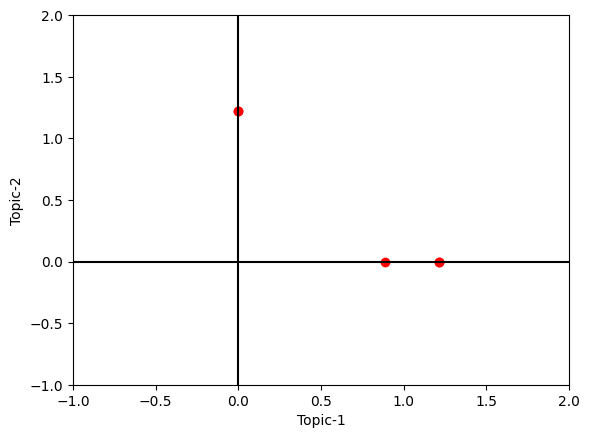

In [222]:
v0 = lsa_Document[:,0]
v1 = lsa_Document[:,1]

#print(v0)
#print(v1)

fig, ax = plt.subplots()

print()
plt.xlim([-1,2])
plt.ylim([-1, 2])

ax.scatter(list(np.abs(v0)), list(np.abs(v1)), color='red')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.xlabel('Topic-1')
plt.ylabel('Topic-2')
plt.show()

In [226]:
# Function to compute cosine similarity between two points
def cosine_similarity(pt1, pt2):
    return np.dot(pt1, pt2) / (np.linalg.norm(pt1) * np.linalg.norm(pt2))

# Number of documents
numDocu = len(lsa_Document)

# Initialize matrices for cosine similarity and cosine distance
cosine_SimMatrix = np.zeros((numDocu, numDocu))
cosine_DistMatrix = np.zeros((numDocu, numDocu))

# Compute cosine similarity and distance for each pair of documents
for i in range(numDocu):
    for j in range(numDocu):
        cosine_SimMatrix[i, j] = cosine_similarity(lsa_Document[i], lsa_Document[j])
        cosine_DistMatrix[i, j] = 1 - cosine_SimMatrix[i, j]

# Print the matrices
print('Cosine Similarity Matrix:')
print(cosine_SimMatrix)
print('\nCosine Distance Matrix:')
print(cosine_DistMatrix)

Cosine Similarity Matrix:
[[ 1.  1.  0.  1.  0.]
 [ 1.  1. -0.  1. -0.]
 [ 0. -0.  1. -0.  1.]
 [ 1.  1. -0.  1. -0.]
 [ 0. -0.  1. -0.  1.]]

Cosine Distance Matrix:
[[0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]]


## Problem 5.5
Which documents are more appropriate for ‘Topic-1’ and ‘Topic-2’?

In [227]:
# Each row corresponds to a document, and each column corresponds to a topic/component

# Identify the document with the highest value for Topic-1
topic_1_scores = lsa_Document[:, 0]  # All rows, first column
max_topic_1_index = np.argmax(topic_1_scores)

# Identify the document with the highest value for Topic-2
topic_2_scores = lsa_Document[:, 1]  # All rows, second column
max_topic_2_index = np.argmax(topic_2_scores)

print(f"Document most relevant to 'Topic-1': Document {max_topic_1_index+1}")
print(f"Document most relevant to 'Topic-2': Document {max_topic_2_index+1}")


Document most relevant to 'Topic-1': Document 2
Document most relevant to 'Topic-2': Document 5


## Problem 5.6
Which are the top 2 words that describe ‘Topic-1’ and ‘Topic-2’?

In [230]:
# Fit the vectorizer to your corpus to build the vocabulary
vectorized_corpus = vectorizer.fit_transform(corpus)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Apply Truncated SVD
svd_model = TruncatedSVD(n_components=sigma_significant_num)

# Fit the SVD model to the vectorized corpus
lsa_Document = svd_model.fit_transform(vectorized_corpus)

# Get the components (V^T matrix) from the TruncatedSVD model
components = svd_model.components_

# Top 2 words for Topic-1
top_words_topic_1 = components[0].argsort()[-2:][::-1]  # Sort the first row and get indices of the top 2 values
top_words_topic_1_names = [feature_names[i] for i in top_words_topic_1]

# Top 2 words for Topic-2
top_words_topic_2 = components[1].argsort()[-2:][::-1]  # Sort the second row and get indices of the top 2 values
top_words_topic_2_names = [feature_names[i] for i in top_words_topic_2]

print(f"Top 2 words for 'Topic-1': {top_words_topic_1_names}")
print(f"Top 2 words for 'Topic-2': {top_words_topic_2_names}")


Top 2 words for 'Topic-1': ['runs', 'pitcher']
Top 2 words for 'Topic-2': ['quarterback', 'touchdown']
